# 这是一个从[PySDR](https://pysdr.org/zh/index-zh.html)学习的文件

In [66]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import fft
phi = np.pi

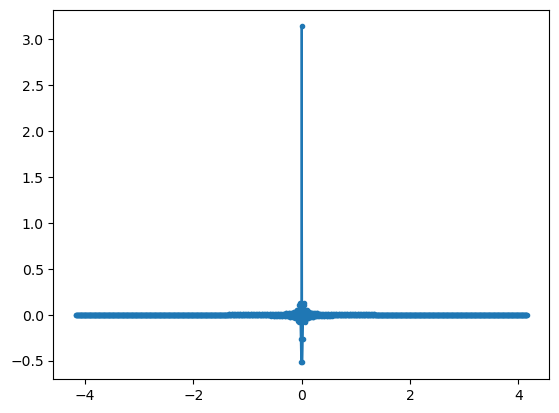

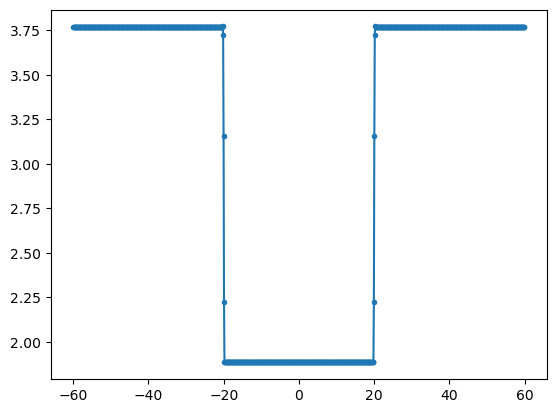

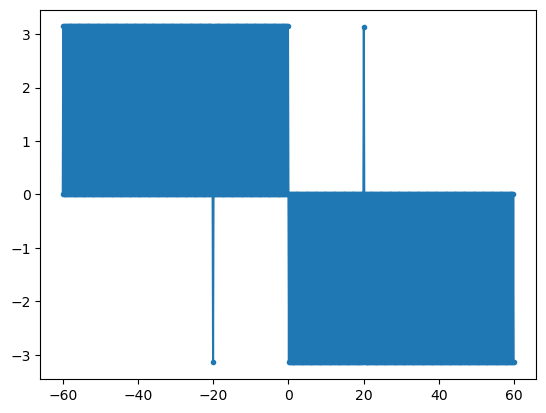

In [89]:
# 频率域
# 0.15 Hz 的简单正弦波。我们还将使用 1 Hz 的采样率，也就是说我们在 0 秒、1 秒、2 秒、3 秒等时间点进行采样。
# FFT and FFTSHIFT
def ffts(s):
    s = s * np.hamming(len(s))
    S = fft.fft(s)
    S = fft.fftshift(S)
    return S


Fs = 120
Ts = 1 / Fs
N = 1000

# t = np.arange(0.01, N * Ts + 0.01, Ts)
t = np.arange(-N//2, N//2) * Ts
# s = np.sin(2 * np.pi * 0.15 * t)
# s = (np.sin(2 * phi * 0.15 * t)) / (t * phi)
s = np.sinc(2 * 100 * t) * phi 
# 画一下sinc图
plt.figure(2)
plt.plot(t, s, ".-")
# 画一下sinc的频率域


S = ffts(s)
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs / -2, Fs / 2, Fs / (N))
plt.figure(0)
plt.plot(f, S_mag, ".-")
plt.figure(1)
plt.plot(f, S_phase, ".-")

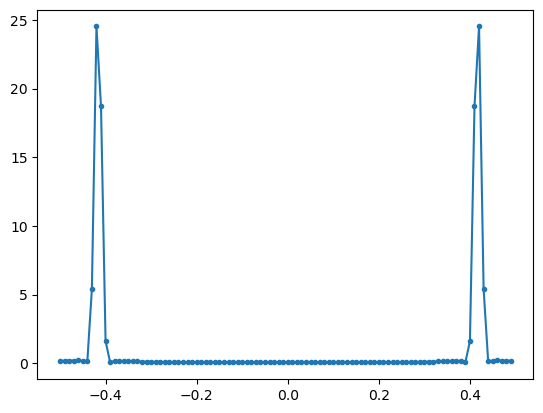

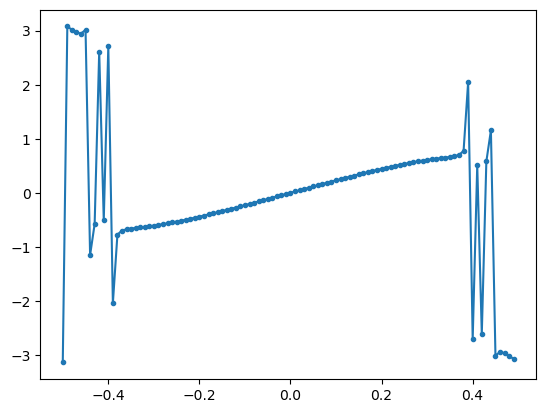

In [28]:
F1 = 0.5 * 0.15
F2 = 2.4 * 0.15


def Tg(F: float):
    return 1 / F


t = np.arange(0, N * Tg(F2), Tg(F2))
s = np.sin(2 * np.pi * 0.15 * t)
# a = np.sin(2 * np.pi * 0.2 * t)
S = ffts(s)
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs / -2, Fs / 2, Fs / N)
plt.figure(0)
plt.plot(f, S_mag, ".-")
plt.figure(1)
plt.plot(f, S_phase, ".-")

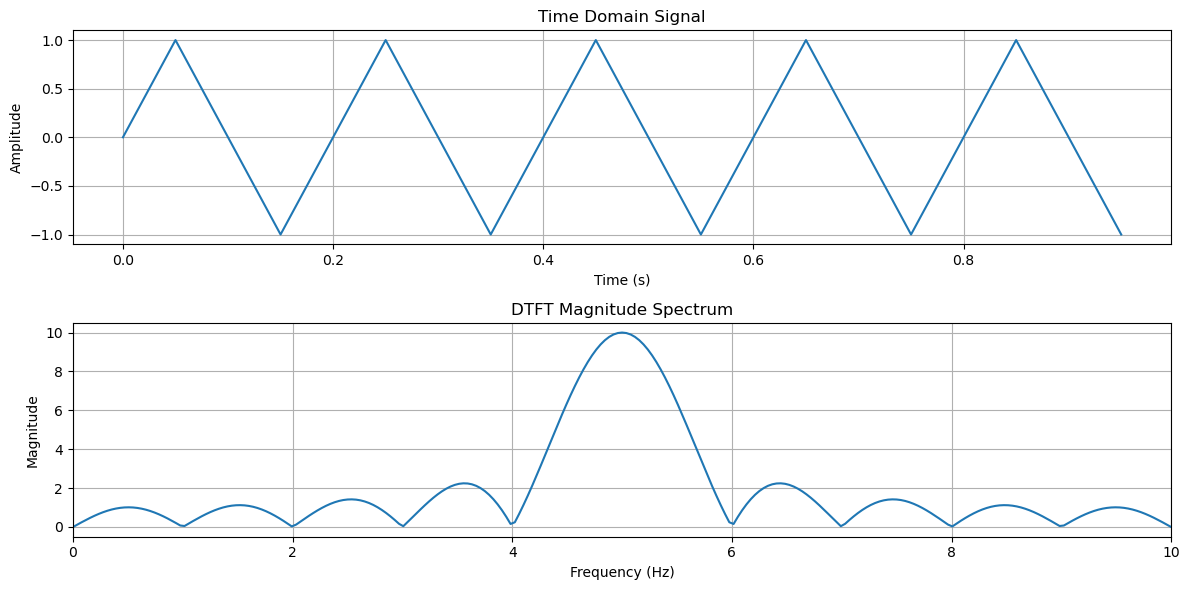

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
fs = 20  # 采样频率 (Hz)
t = np.arange(0, 1, 1/fs)  # 时间向量 (0 到 1 秒，步长为 1/fs)
f = 5  # 信号频率 (Hz)

# 生成正弦波信号
signal = np.sin(2 * np.pi * f * t)

# 计算 DTFT
def dtft(signal, N):
    # 频率范围
    k = np.arange(N)  # 频率点
    n = np.arange(len(signal))  # 时间点
    # 计算 DTFT
    X = np.zeros(N, dtype=complex)
    for ki in k:
        X[ki] = np.sum(signal * np.exp(-1j * 2 * np.pi * ki * n / N))
    return X

# 设置频率点数
N = 512
X_dtft = dtft(signal, N)

# 频率轴
frequencies = np.linspace(0, fs, N, endpoint=False)

# 绘制信号和 DTFT 结果
plt.figure(figsize=(12, 6))

# 原始信号
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# DTFT 结果
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(X_dtft))
plt.title('DTFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)  # 只显示 Nyquist 频率以下的部分
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np



signal = np.array([1, 2, 3, 4])
N = 100
X = dtft(signal, N)

# 绘制 DTFT 结果
import matplotlib.pyplot as plt

plt.plot(np.abs(X))
plt.xlabel('频率点')
plt.ylabel('幅度')
plt.title('DTFT 结果')
plt.show()

C:\Users\12595\AppData\Local\Temp\ipykernel_11640\2779846644.py:8: RuntimeWarning: invalid value encountered in divide
  sinc = np.sin(w0 * (n - N / 2)) / np.pi / (n - N / 2)


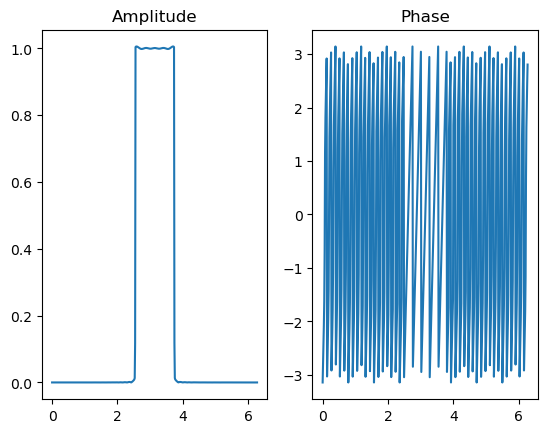

In [36]:
# Sinc函数和矩形窗
N = 2000  # increase N, then the spectrum converge to window function
Nc = N // 2

n = np.arange(N)  # 定义序号
w0 = 0.6
phi = np.pi
sinc = np.sin(w0 * (n - N / 2)) / np.pi / (n - N / 2)
sinc[Nc] = w0 / np.pi
sinc = sinc * np.exp(1j * phi * n)

ws, h = signal.freqz(sinc, whole=True)
# 离散时间傅里叶变换的实部和虚部
plt.subplot(121)
plt.plot(ws, np.abs(h))
plt.title("Amplitude")
plt.subplot(122)
plt.plot(ws, np.angle(h))
plt.title("Phase")
plt.show()